In [140]:
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
#pylab.rcParams['figure.figsize'] = (10, 8)

import os
from dtw import dtw
import pandas as pd

cwd = os.getcwd()
print (cwd)
# import mlpy

Populating the interactive namespace from numpy and matplotlib
/accounts/grad/jorothy_gong/MyShakeAnalysis/code/Yun


In [2]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = [t0 + tmp/sampling_rate for tmp in range(0, npoints)]
    
    # station latitude and long
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

## Read simulated data

1625 1625 25.0


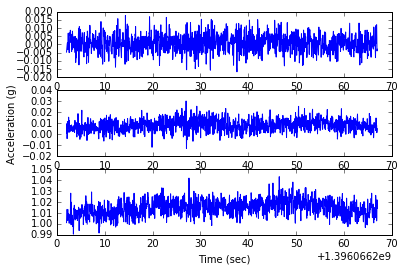

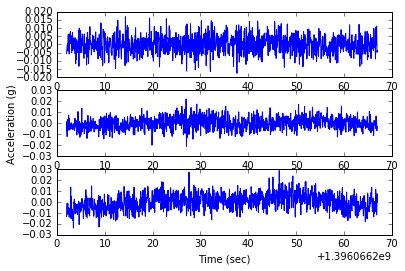

In [7]:
data = json.load(open('../../data/EQ/simulated/12951_M5.1_1396066202.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
#print(data['header'])
print (len(x), len(t), rate)
plot_data(t, x, y, z)

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Read shake table data

984 984 25.0


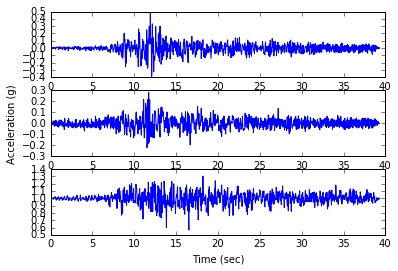

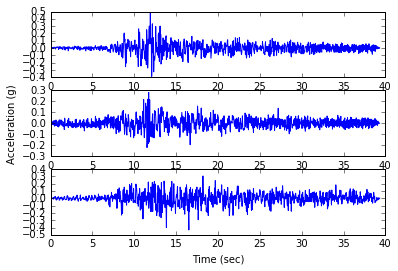

In [8]:
data = json.load(open('../../data/EQ/shake_table/trial142_phone2.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
plot_data(t, x, y, z)
# from matplotlib.pyplot import specgram
# specgram(z, NFFT=100, Fs=rate, noverlap = 50);

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Read human data

6284 6284 25.0


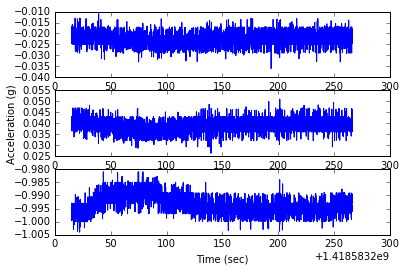

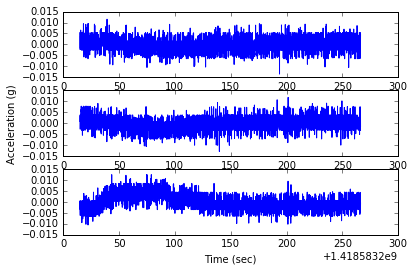

In [9]:
data = json.load(open('../../data/Human/013306004148017_1418583215.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
plot_data(t, x, y, z)

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Dynamic Time Warping

In [4]:
def Normalize_Seq(seq_x = None, seq_y = None, seq_z = None, dim = 3):
    """
    May need further normalization later.
    Take either 1-dim accelaretion sequence or 3-dim, or 2-idm.
    """
    tmp = []
    if seq_x != None:
        seq_x = seq_x - np.mean(seq_x)
        tmp.append(seq_x)
    if seq_y != None:
        seq_y = seq_y - np.mean(seq_y)
        tmp.append(seq_y)
    if seq_z != None:
        seq_z = seq_z - np.mean(seq_z)
        tmp.append(seq_z)
        
    if dim != 3:
        return tmp
    else:
        return seq_x, seq_y, seq_z

In [5]:
def MyDistance(x, y):
    return (x * x) + (y * y)

def Cal_DTW(x, y, fun = None):
    #print('ha')
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y).reshape(-1, 1)
    if fun == None:
        dist, cost, acc, path = dtw(x, y, dist = lambda x, y: norm(x - y, ord=1))
    else:
        dist, cost, acc, path = dtw(x, y, dist = fun)
        
    return dist

In [6]:
# Cal_DTW_Compare
def DTW_Self(seq, window = 2, interval = 0.5, gap = 1/5, rate = 25):
    """
    Now sequence is only 1-dim accelaration sequence.
    Add if sequence length < 5 seconds
    """
    seq = seq - np.mean(seq)
    seq_len = len(seq)
    seq_win = int(window * rate)
    seq_int = int(interval * rate)
    compute_gap = int(gap * rate)
    return [Cal_DTW(seq[i : (i + seq_win)], seq[(i + seq_int) : (i + seq_win + seq_int)]) 
            for i in range(0, seq_len - seq_win - seq_int, compute_gap)]
 

In [30]:
path_to_json = cwd + '/../../data/EQ/shake_table/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(len(json_files))
json_files = json_files

192


In [31]:
DTW = {}

for js in json_files:
    print(js)
    with open(path_to_json+js) as infile:
        data = json.load(infile)
      
    t, x, y, z = get_data(data)
    rate = data['header']['sampling_rate']
    x, y, z = Normalize_Seq(x, y, z)
    DTW[js] = {'DTW_x': DTW_Self(seq = x, rate = rate), 
                     'DTW_y': DTW_Self(seq = y, rate = rate), 
                     'DTW_z': DTW_Self(seq = z, rate = rate)}
    
with open(path_to_json + 'DTW_shake.json', 'w') as f:
    json.dump(DTW, f, indent=None, sort_keys=False)

trial38_phone4.json
trial165_phone1.json
trial143_phone0.json
trial21_phone1.json
trial62_phone3.json
trial155_phone5.json
trial144_phone3.json
trial162_phone2.json
trial65_phone0.json
trial63_phone5.json
trial45_phone4.json
trial39_phone2.json
trial153_phone0.json
trial27_phone4.json
trial145_phone5.json
trial163_phone4.json
trial65_phone4.json
trial38_phone0.json
trial143_phone4.json
trial165_phone5.json
trial155_phone1.json
trial21_phone5.json
trial27_phone0.json
trial64_phone2.json
trial153_phone4.json
trial163_phone0.json
trial145_phone1.json
trial45_phone0.json
trial20_phone3.json
trial63_phone1.json
trial142_phone2.json
trial164_phone3.json
trial156_phone3.json
trial61_phone5.json
trial151_phone0.json
trial148_phone5.json
trial33_phone1.json
trial147_phone5.json
trial146_phone3.json
trial67_phone0.json
trial40_phone3.json
trial151_phone4.json
trial66_phone2.json
trial148_phone1.json
trial147_phone1.json
trial33_phone5.json
trial61_phone1.json
trial166_phone3.json
trial150_phone2

## Visualize Features

In [33]:
with open(cwd + '/DTW_shake.json') as infile:
    DTW_shake = json.load(infile)
    
with open(cwd + '/DTW_human.json') as infile:
    DTW_human = json.load(infile)

In [161]:
# each: list of list of DTW trend
DTW_shake_x = [DTW_shake[i]['DTW_x'] for i in DTW_shake.keys()]
DTW_human_x = [DTW_human[i]['DTW_x'] for i in DTW_human.keys()]

DTW_shake_y = [DTW_shake[i]['DTW_y'] for i in DTW_shake.keys()]
DTW_human_y = [DTW_human[i]['DTW_y'] for i in DTW_human.keys()]

DTW_shake_z = [DTW_shake[i]['DTW_z'] for i in DTW_shake.keys()]
DTW_human_z = [DTW_human[i]['DTW_z'] for i in DTW_human.keys()]

In [159]:
# radius = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
# area = [3.14159, 12.56636, 28.27431, 50.26544, 78.53975, 113.09724]
# square = [1.0, 4.0, 9.0, 16.0, 25.0, 36.0]
# plt.plot(radius, area, label='Circle')
# plt.plot(radius, square, marker='o', linestyle='--', random.sample(range(len(DTW_shake_x)),30), label='Square')
# plt.xlabel('Radius/Side')
# plt.ylabel('Area')
# plt.title('Area of Shapes')
# plt.legend()
# plt.show()

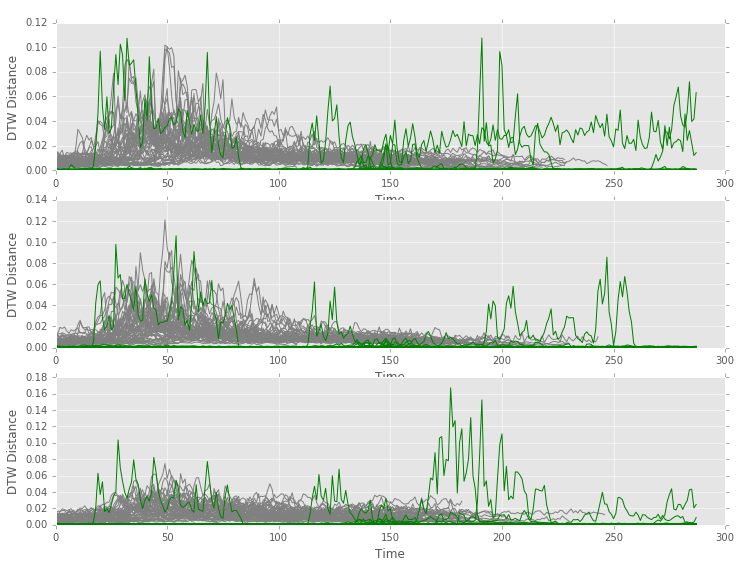

In [165]:
#plt.style.use(['dark_background'])
plt.style.use(['ggplot'])

figure(num=None, figsize=(12, 9), dpi=80)

plt.subplot(311)
[plt.plot(DTW_shake_x[i], color='grey') for i in random.sample(range(len(DTW_shake_x)),50)]
[plt.plot(DTW_human_x[i], color='green') for i in random.sample(range(len(DTW_human_x)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')
plt.title('Human v.s. Shake, DTW Distance for window = 2, interval = 0.5')

plt.subplot(312)
[plt.plot(DTW_shake_y[i], color='grey') for i in random.sample(range(len(DTW_shake_y)),50)]
[plt.plot(DTW_human_y[i], color='green') for i in random.sample(range(len(DTW_human_y)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')

plt.subplot(313)
[plt.plot(DTW_shake_z[i], color='grey') for i in random.sample(range(len(DTW_shake_z)),50)]
[plt.plot(DTW_human_z[i], color='green') for i in random.sample(range(len(DTW_human_z)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')

plt.show()

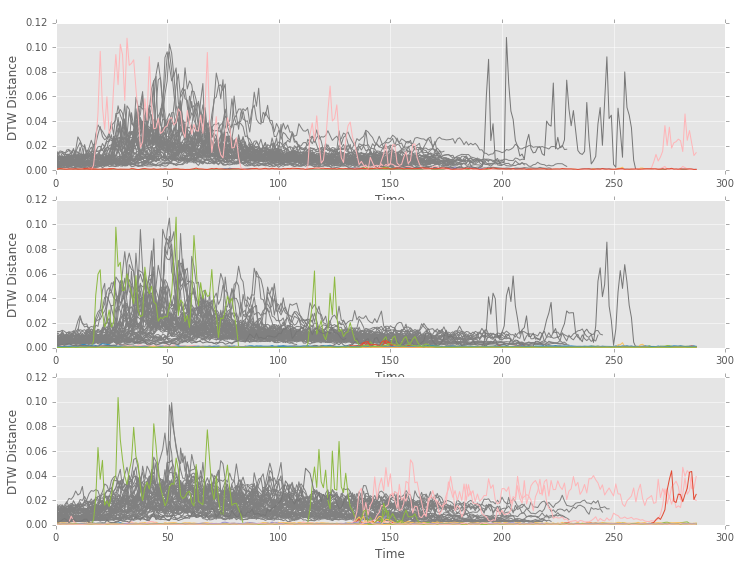

In [175]:
#plt.style.use(['dark_background'])
plt.style.use(['ggplot'])

figure(num=None, figsize=(12, 9), dpi=80)

plt.subplot(311)
[plt.plot(DTW_shake_x[i], color='grey') for i in random.sample(range(len(DTW_shake_x)),50)]
[plt.plot(DTW_human_x[i]) for i in random.sample(range(len(DTW_human_x)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')
plt.title('Human v.s. Shake, DTW Distance for window = 2, interval = 0.5')


plt.subplot(312)
[plt.plot(DTW_shake_y[i], color='grey') for i in random.sample(range(len(DTW_shake_y)),50)]
[plt.plot(DTW_human_y[i]) for i in random.sample(range(len(DTW_human_y)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')

plt.subplot(313)
[plt.plot(DTW_shake_z[i], color='grey') for i in random.sample(range(len(DTW_shake_z)),50)]
[plt.plot(DTW_human_z[i]) for i in random.sample(range(len(DTW_human_z)),50)]
plt.xlabel('Time')
plt.ylabel('DTW Distance')


plt.show()

In [207]:
[list(zip(np.round(DTW_shake_x[i],6), np.round(DTW_shake_y[i],6) , np.round(DTW_shake_z[i],6))) 
 for i in range(len(DTW_shake_x))]

[[(0.003712, 0.0080510000000000009, 0.0066670000000000002),
  (0.005672, 0.0084840000000000002, 0.0065799999999999999),
  (0.0081589999999999996, 0.010859000000000001, 0.0083300000000000006),
  (0.0084110000000000001, 0.011142000000000001, 0.0093690000000000006),
  (0.0078329999999999997, 0.011624000000000001, 0.012323000000000001),
  (0.0081169999999999992, 0.011474, 0.013114000000000001),
  (0.0062649999999999997, 0.011868999999999999, 0.016344999999999998),
  (0.006607, 0.01221, 0.014992),
  (0.0061310000000000002, 0.011924000000000001, 0.013099),
  (0.0061720000000000004, 0.010681, 0.0089899999999999997),
  (0.0086929999999999993, 0.011015, 0.010192),
  (0.0082920000000000008, 0.010994, 0.011753),
  (0.0076429999999999996, 0.010263, 0.013225000000000001),
  (0.0066369999999999997, 0.010534, 0.014234),
  (0.0072199999999999999, 0.0085760000000000003, 0.019935999999999999),
  (0.0073270000000000002, 0.0093869999999999995, 0.011526),
  (0.0077210000000000004, 0.0085760000000000003, 0.

In [208]:
np.round(DTW_shake_y[i],6)

array([ 0.008051,  0.008484,  0.010859,  0.011142,  0.011624,  0.011474,
        0.011869,  0.01221 ,  0.011924,  0.010681,  0.011015,  0.010994,
        0.010263,  0.010534,  0.008576,  0.009387,  0.008576,  0.00771 ,
        0.008348,  0.008775,  0.009076,  0.010628,  0.009482,  0.010429,
        0.011911,  0.011486,  0.009829,  0.010762,  0.011904,  0.011882,
        0.010461,  0.010629,  0.027464,  0.028131,  0.04269 ,  0.033919,
        0.034495,  0.015966,  0.015452,  0.011676,  0.012924,  0.021941,
        0.035952,  0.044075,  0.052752,  0.043815,  0.043548,  0.02564 ,
        0.018652,  0.014134,  0.021525,  0.023367,  0.02723 ,  0.031109,
        0.028223,  0.025606,  0.021155,  0.020511,  0.013452,  0.014363,
        0.017216,  0.017014,  0.015823,  0.016895,  0.018476,  0.016401,
        0.016939,  0.017854,  0.015335,  0.017985,  0.01441 ,  0.017172,
        0.019417,  0.01692 ,  0.016532,  0.013214,  0.016461,  0.015146,
        0.014609,  0.016547,  0.015333,  0.014405, 